**Lógica Fuzzy(difusa ou nebulosa)**

https://youtu.be/EnfSJZU4MCU?si=KsZkzOCF2SuwMcXs

- lógica tradicional booleana de predicados - true e false.
- fuzzy: adaptação da lógica tradicional para lidar com mais de 2 valores, descritos por linguagens humanas.

**Grau de pertinência(grade of membership)**
valor de [0,1] que representa quanto um valor pertence a um conjunto ou range de valores

Três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação

In [191]:
# Instação dos pacotes
!pip install scikit-fuzzy

***Fuzzificação***

Nessa fase vamos definir
1. Análise do Problema
2. Definição das Variáveis
3. Definição das Funções de pertinência
4. Criação das Regiões

**Análise do Problema**

Sistema fuzzy para modelar a eficiência do adubo organomineral analizando as quantidades de Nitrogênio(N), Fósforo(P), Potássio(K) e Umidade do Solo(Hu).
* Variáveis de Entrada:
  * Nitrogênio:
      * Universo: [0, 20]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
  * Fósforo:
      * Universo: [0, 30]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
  * Potássio:
      * Universo: [0, 20]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
  * Umidade do Solo:
      * Universo: [0, 50]%
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
* Variáveis de Saída:
  * Proporção_NPK
      * Universo: [1, 1.5, 2]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes

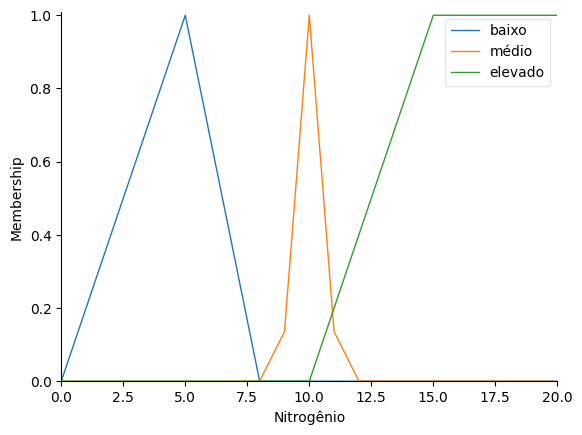

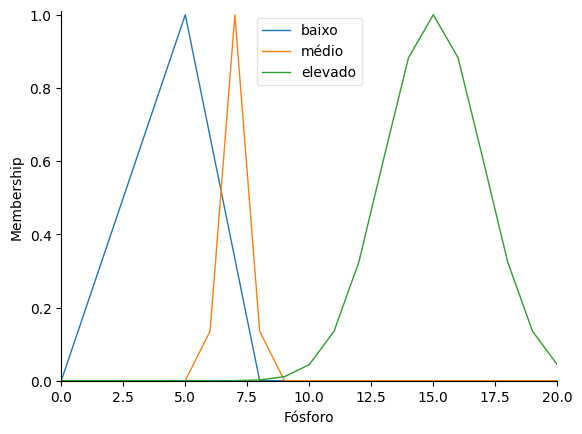

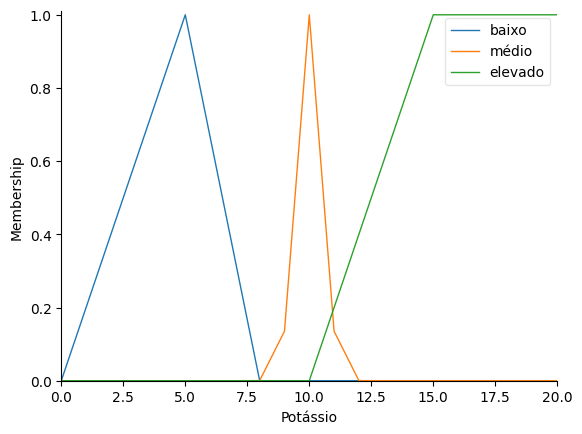

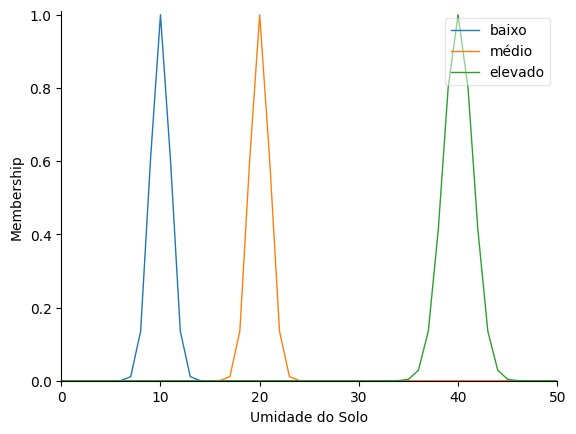

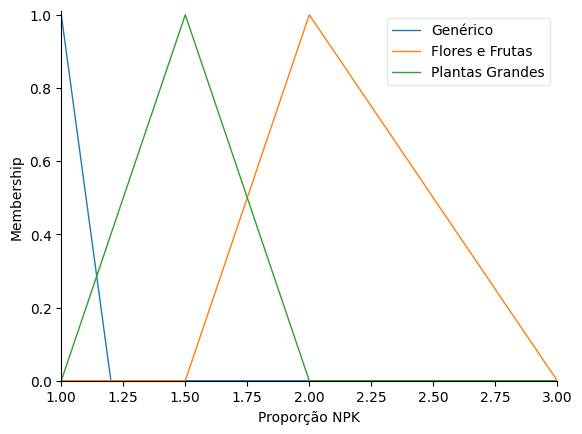

In [192]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
nitrogenio = ctrl.Antecedent(np.arange(0, 20 + 1,1), "Nitrogênio")
fosforo = ctrl.Antecedent(np.arange(0, 20 + 1,1), "Fósforo")
potassio = ctrl.Antecedent(np.arange(0, 20 + 1,1), "Potássio")
umidade = ctrl.Antecedent(np.arange(0, 50 + 1, 1), "Umidade do Solo")
prop_npk = ctrl.Consequent(np.arange(1, 3 + 0.1, 0.1), "Proporção NPK")

# Criando as funções de pertinência para o Nitrogênio
nitrogenio['baixo'] = fuzz.trimf(nitrogenio.universe, [0, 5, 8])
nitrogenio['médio'] = fuzz.gaussmf(nitrogenio.universe, 10, 0.5)
nitrogenio['elevado'] = fuzz.trapmf(nitrogenio.universe, [10, 15, 20, 20])

# Criando as funções de pertinência para o Fósforo
fosforo['baixo'] = fuzz.trimf(fosforo.universe, [0, 5, 8])
fosforo['médio'] = fuzz.gaussmf(fosforo.universe, 7, 0.5)
fosforo['elevado'] = fuzz.gaussmf(fosforo.universe, 15, 2)

# Criando as funções de pertinência para o Potássio
potassio['baixo'] = fuzz.trimf(potassio.universe, [0, 5, 8])
potassio['médio'] = fuzz.gaussmf(potassio.universe, 10, 0.5)
potassio['elevado'] = fuzz.trapmf(potassio.universe, [10, 15, 20, 20])

# Criando as funções de pertinência para a Umidade do Solo
umidade['baixo'] = fuzz.gaussmf(umidade.universe, 10, 1)
umidade['médio'] = fuzz.gaussmf(umidade.universe, 20, 1)
umidade['elevado'] = fuzz.gaussmf(umidade.universe, 40, 1.5)

# Criando as funções de pertinência para a Proporção NPK
prop_npk['Genérico'] = fuzz.trimf(prop_npk.universe, [1,1, 1.2])
prop_npk['Flores e Frutas'] = fuzz.trimf(prop_npk.universe, [1.5, 2, 3])
prop_npk['Plantas Grandes'] = fuzz.trimf(prop_npk.universe, [1, 1.5, 2])

nitrogenio.view()
fosforo.view()
potassio.view()
umidade.view()
prop_npk.view()

**Inferência Fuzzy**

- Definição das regras, que serão processadas paralelamente
- Criação da região resultante
* Base de Conhecimento/Regras
  * regra para cenario generico
  * regra para plantação de frutas
  * regra para plantação de árvores grandes

**Defuzzificação**
- Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.


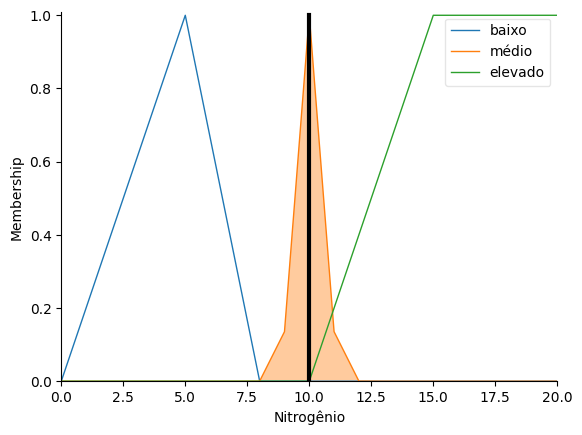

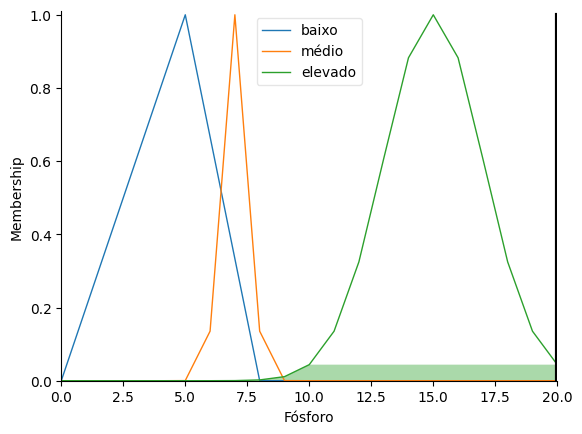

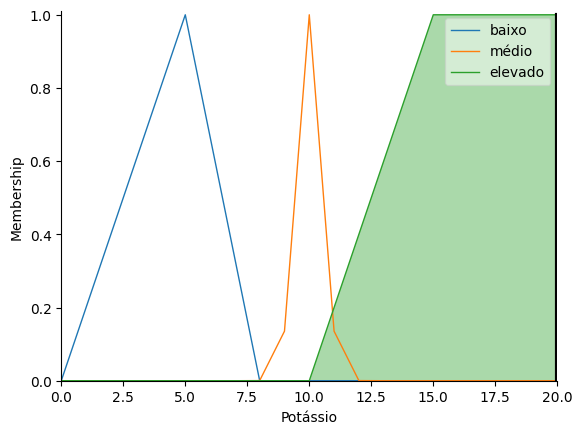

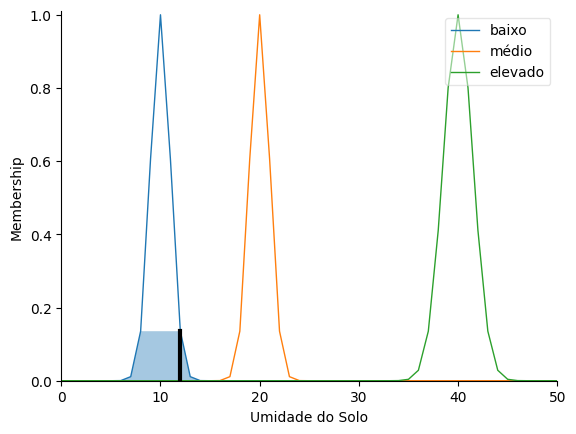

In [193]:
# Base de Conhecimento/Regras
regra1 = ctrl.Rule(nitrogenio['médio'] & fosforo['médio'], prop_npk['Genérico'] )
regra2 = ctrl.Rule(fosforo['elevado'] & potassio['elevado'], prop_npk['Flores e Frutas'])
regra3 = ctrl.Rule(nitrogenio['elevado'] & umidade['elevado'] & (fosforo['médio'] | potassio['médio']), prop_npk['Plantas Grandes'])

# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

mock = [10, # N
        20, # P
        20, # K
        12] #Umidade

validade_simulador.input["Nitrogênio"] = mock[0]
validade_simulador.input["Fósforo"] = mock[1]
validade_simulador.input["Potássio"] = mock[2]
validade_simulador.input["Umidade do Solo"] = mock[3]

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
nitrogenio.view(sim=validade_simulador)
fosforo.view(sim=validade_simulador)
potassio.view(sim=validade_simulador)
umidade.view(sim=validade_simulador)